
We start off with importing the necessary packages (Pandas and NumPy), and our self-written SPCA script which contains all the code for performing the SPCA estimation.

In [58]:
import pandas as pd
import numpy as np
import spca
import utils
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

We will start by looking at the pitprops dataset, thus using pandas we import the dataset.

In [59]:
# Import both the pitprops and gene datasets; for the pitprops dataset, use the first column as the indices.
pitprops = pd.read_csv("data/pitprops.csv", index_col=0)

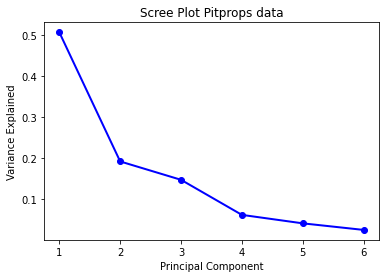

In [60]:
pca = PCA(n_components=6)
pca_fit = pca.fit(pitprops)
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot Pitprops data')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

We set the <img style="transform: translateY(0.1em); background: white;" src="https://render.githubusercontent.com/render/math?math=l_2">-norm equal to the <img style="transform: translateY(0.1em); background: white;" src="https://render.githubusercontent.com/render/math?math=%5Clambda">'s which are provided by Zou, Hastie, and Tibshirani (2006). We then run our self-written function sparcepca() to do the actual SPCA analysis. We first look at our self-written function which uses the elasticnet function from the scikit-learn package.

In [9]:
lambda2 = np.array([0.06, 0.16, 0.1, 0.5, 0.5, 0.5])
A, B, vh = spca.sparcepca(X=pitprops, lambda2=lambda2, lambda1=0.1, k=6, max_iteration=int(1e3), threshold=1e-4, type="cov")
print(B)

print(utils.variance(pitprops, vh))
print(utils.nonzeroloadings(B))

# Print results

[[ 0.30704688  0.          0.15428964  0.          0.          0.        ]
 [ 0.3073818   0.          0.15433007  0.          0.          0.        ]
 [ 0.04061214  0.23555318  0.10894197 -0.         -0.         -0.        ]
 [ 0.1095264   0.27027236  0.         -0.          0.         -0.        ]
 [ 0.01209413  0.         -0.26028444 -0.          0.         -0.        ]
 [ 0.21381332  0.07183506 -0.17538487 -0.         -0.          0.        ]
 [ 0.33713612 -0.         -0.13544967  0.         -0.          0.        ]
 [ 0.22568717 -0.08640404  0.         -0.         -0.         -0.        ]
 [ 0.2724129  -0.          0.0573439  -0.          0.         -0.        ]
 [ 0.31089265 -0.07154163 -0.          0.         -0.         -0.        ]
 [-0.          0.          0.06392704 -0.04524396  0.          0.        ]
 [-0.06752407  0.11868109  0.03748981  0.          0.          0.        ]
 [-0.06450399  0.          0.24498359  0.          0.          0.        ]]
105.57682489556007
[12  

In [82]:
Z = B

np.diag(np.linalg.qr(Z)[1]**2).reshape(6, 1)

#print(np.trace(Z.T @ Z), np.sum((np.linalg.qr(Z)[1])**2))


array([[0.59244789],
       [0.16032335],
       [0.24307236],
       [0.0020126 ],
       [0.        ],
       [0.        ]])

In [90]:
sum(np.cov(Z.T @ Z))

array([[ 5.79252224e-02, -2.94395537e-03, -3.73902820e-03,
         1.12082927e-05,  0.00000000e+00,  0.00000000e+00],
       [-2.94395537e-03,  4.09708838e-03, -2.13656615e-04,
        -4.98381057e-06,  0.00000000e+00,  0.00000000e+00],
       [-3.73902820e-03, -2.13656615e-04,  9.67336601e-03,
        -1.35383357e-04,  0.00000000e+00,  0.00000000e+00],
       [ 1.12082927e-05, -4.98381057e-06, -1.35383357e-04,
         2.48733091e-06,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00]])

Second, we look at our self written sparcepca() function using our self-written elasticnet minimizer.

# Note: initial run suggests 0.1s for package implementation, 0.8s for our own implementation.
The difference in computational effiency could be because of numerical optimizations, more a more efficient optimization algorithm choice, or ?

In [62]:
A, B, vh = spca.sparcepca(X=pitprops, lambda2=lambda2, lambda1=0.1, k=6, max_iteration=int(1e3), threshold=1e-4, type="cov", optimizer="self")
print(B)


[[ 0.09386998  0.06740624  0.07216062  0.04119735  0.04117323 -0.06302716]
 [ 0.09427643  0.05758885  0.0818184   0.04639206  0.05619881 -0.08569588]
 [ 0.02892203  0.16727943 -0.04925451 -0.03542775 -0.17427592  0.14515214]
 [ 0.04027168  0.14097718 -0.12268551 -0.02473799 -0.17725915  0.02841968]
 [ 0.01329387 -0.05262257 -0.1675201  -0.02218216 -0.08774315 -0.32910868]
 [ 0.06612278 -0.00439321 -0.16544676  0.02864955  0.15736254 -0.02751441]
 [ 0.0929505  -0.05867726 -0.08810975  0.0293493   0.10716013 -0.0013976 ]
 [ 0.06824538 -0.05852869  0.08460921 -0.12896598 -0.09234373  0.02899934]
 [ 0.08290592  0.00529769  0.07228257 -0.04368508  0.05287135 -0.01800272]
 [ 0.08808786 -0.07687641  0.04134476  0.09260813 -0.07792041  0.09109424]
 [-0.0025778   0.06352432  0.02452629 -0.36297387  0.17090054 -0.09223225]
 [-0.02675633  0.10618055 -0.03202471  0.13585596  0.29913835  0.08932349]
 [-0.02615855  0.09546205  0.11352347  0.13701936 -0.03981298 -0.32950263]]


In [63]:
df = pd.DataFrame(B)
latextable = pd.DataFrame.to_latex(df)
print(latextable)

\begin{tabular}{lrrrrrr}
\toprule
{} &         0 &         1 &         2 &         3 &         4 &         5 \\
\midrule
0  &  0.093870 &  0.067406 &  0.072161 &  0.041197 &  0.041173 & -0.063027 \\
1  &  0.094276 &  0.057589 &  0.081818 &  0.046392 &  0.056199 & -0.085696 \\
2  &  0.028922 &  0.167279 & -0.049255 & -0.035428 & -0.174276 &  0.145152 \\
3  &  0.040272 &  0.140977 & -0.122686 & -0.024738 & -0.177259 &  0.028420 \\
4  &  0.013294 & -0.052623 & -0.167520 & -0.022182 & -0.087743 & -0.329109 \\
5  &  0.066123 & -0.004393 & -0.165447 &  0.028650 &  0.157363 & -0.027514 \\
6  &  0.092950 & -0.058677 & -0.088110 &  0.029349 &  0.107160 & -0.001398 \\
7  &  0.068245 & -0.058529 &  0.084609 & -0.128966 & -0.092344 &  0.028999 \\
8  &  0.082906 &  0.005298 &  0.072283 & -0.043685 &  0.052871 & -0.018003 \\
9  &  0.088088 & -0.076876 &  0.041345 &  0.092608 & -0.077920 &  0.091094 \\
10 & -0.002578 &  0.063524 &  0.024526 & -0.362974 &  0.170901 & -0.092232 \\
11 & -0.026756 &  0.1

To-do w.r.t. pitprops
- Convert sparcepca() output into an easy-to-copy table - Done
- Compare self-built function to sota - Done

Then w.r.t. the gene dataset;
- Adapt spca and elasticnet functions to gene dataset
- Output/plot outcomes from gene dataset like in Zou, Hastie, and Tibshirani (2006)
- Again, compare self-built vs. sota

Second, we will take a look at the gene dataset. We start here with some data cleanup; remove present/absent calls which are not relevant for our research, take subsample of 144 and set row names to "Accession" column (Note the description column is not unique, while the accession column is).

In [64]:
genedata = pd.read_csv("data/GCM_Total.csv")
genedata = genedata[genedata.columns.drop(list(genedata.filter(regex='Unnamed')))]
genedata.index = genedata.iloc[:, 1]
genedata = genedata.iloc[:, 2:146]

Genedata initial visualisation

In [68]:
print(genedata.shape)
# Get principal components
# Make scree plots

(16063, 144)


In [65]:
lambda2 = np.absolute(np.random.normal(0, 0.1, 16000))

In [66]:
A, B, vh = spca.sparcepca(X=genedata.T, lambda2=lambda2, lambda1=0.9, k=1, max_iteration=int(1e4), threshold=1e-6, type="data")
print(B)

Pre-estimation terminated succesfully


MemoryError: Unable to allocate 120. GiB for an array with shape (1000000, 16063) and data type float64